In [43]:
import pandas as pd
import os
import numpy as np
import scipy

In [77]:
files = os.listdir('results_server/')
filename='results_merged/results_2024_05_23'

In [78]:
# MERGING RESULTS
files = os.listdir('results_server/')
dfs = [
    pd.read_pickle('results_server/{}'.format(f))
    for f in files
    if f[-3:] == 'pkl'
]
df = pd.concat(dfs, ignore_index=True)
df.sort_values(by=['H']).to_csv(filename+".csv")
df.to_pickle(filename+".pkl")

In [83]:
df

,dscrt_train,dscrt,N,H,space,nn_hidden,penalty,initial,constraint,restarts,...,nn_dropout,max_gb,MC_,sig_comp,save_model,res,err,time,train_time,eval_time
0,1000,1000,4,0.333333,log,2.0,0.1,0.0,None,3,...,0.0,32,1048576,tX,True,0.175509,0.000122,2024-05-22 13:43:40,8712.202627,560.893171
1,1000,1000,5,0.250000,log,2.0,0.1,0.0,None,3,...,0.0,32,1048576,tX,True,0.209118,0.000130,2024-05-22 14:37:35,7088.841664,1080.105326
2,1000,1000,5,0.125000,sig,0.0,0.1,0.0,None,3,...,0.0,32,1048576,tX,True,0.270160,0.000132,2024-05-22 13:02:31,1080.811220,1075.801275
3,1000,1000,4,0.250000,sig,0.0,0.1,0.0,None,3,...,0.0,32,1048576,tX,True,0.208723,0.000132,2024-05-22 11:58:55,1533.794449,672.009269
4,1000,1000,5,0.250000,sig,0.0,0.1,0.0,None,3,...,0.0,32,1048576,tX,True,0.209187,0.000131,2024-05-22 12:55:00,1064.135249,1041.561607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,100,100,1,0.100000,log,NaN,0.1,0.0,None,3,...,0.0,32,1048576,tX,True,0.291032,0.000126,2024-05-21 14:48:36,1882.183116,38.432001
66,1000,1000,4,0.500000,log,2.0,0.1,0.0,None,3,...,0.0,32,1048576,tX,True,0.123917,0.000102,2024-05-22 13:40:48,8650.497437,571.560032
67,1000,1000,1,0.062500,sig,0.0,0.1,0.0,None,3,...,0.0,32,1048576,tX,True,0.329117,0.000162,2024-05-22 13:56:05,12505.158759,273.086863
68,1000,1000,4,0.333333,sig,0.0,0.1,0.0,None,3,...,0.0,32,1048576,tX,True,0.175727,0.000125,2024-05-22 11:59:22,1506.819761,672.074105


In [79]:
df = pd.read_pickle(filename+".pkl")

In [80]:
df["err"].max()

0.00016160440676622227

In [81]:
# kappa: H:
benchmarks = {
    0.1: {
            0.0625: 0.29299260336175903,
            0.1: 0.27637816610812527,
            0.125: 0.26401618499869683,
            0.2: 0.22819477521602005,
            0.25: 0.2064417971966493,
            0.3: 0.18655548102278066,
            0.3333333333333333: 0.17430122981223287,
            0.4: 0.15202891045333583,
            0.5: 0.12354603195750886,
            0.6: 0.09991169320038855,
            0.7: 0.08004908960839505,
            0.75: 0.0712373683442226,
            0.8: 0.0630304375132153,
            0.9: 0.048030974549881165,
            1.0: 0.034},
    0.01: {
        0.1: 0.20085137340115772,
        0.2: 0.1428418428389489,
        0.3: 0.09954529063458387,
        0.4: 0.06849005754875274,
        0.5: 0.04653426410750604,
        0.6: 0.03114831101100001,
        0.7: 0.02044020442056757,
        0.8: 0.013037332367746074,
        0.9: 0.00795731031703343,
        1.0: 0.004788375569560145,
    },
}

In [84]:
# H in collumns's

penalty = 0.1
discrt = 1000
mode = ['tX']
space = ['sig', 'log']
N_range = [1,2,3,4,5]
#H_range = [.1,.2,.3,.5,.8,1.0]
H_range = [1.0/16,1.0/8,1.0/4,1.0/2,3.0/4,1.0]

df_ = df.query('dscrt == @discrt and penalty == @penalty and N in @N_range and sig_comp in @mode and space in @space')
df_ = df_.sort_values(by=['sig_comp','N', 'H'], ascending=[False, True, True])

best_values = { 
    H: df_.query("H == @H")["res"].dropna().to_numpy().min().round(3)
    for H in H_range
}

# First row
print('  &  $H$', end=' ')
for H in H_range:
    print('&  {}'.format(H), end=' ')
print(' \\\\')

# Benchmark row
if penalty in benchmarks.keys():
    print('\\hline')
    print('  \multicolumn{2}{c |}{th. optimum}  ', end=' ')
    for H in H_range:
        if H in benchmarks[penalty]:
            print('& {:0.3f}'.format(benchmarks[penalty][H]), end=' ') # print benchmark
        else: 
            print('&  ', end=' ')
    print(' \\\\ ')



for spc in space:
    print('\\hline')
    print(r"\multirow{{ {} }}{{*}}{{ $\mathcal{{A}}_{{ {} }}$ }}".format(len(N_range), spc), end='')
    for N in N_range:
        print('& $N = {}$ '.format(N), end=' ')

        for H in H_range:
            res = df_.query("N == @N and space == @spc and H == @H")[["res", "err"]]
                
            if len(res) == 0:
                print('&      ', end=' ')
            else:
                v = res["res"].to_numpy()[0]
                if v.round(3) == best_values[H]:
                    print('& \\textbf{{ {:0.3f} }}'.format(v), end=' ')
                else:
                    print('& {:0.3f}'.format(v), end=' ')
        
        print(' \\\\ ')

  &  $H$ &  0.0625 &  0.125 &  0.25 &  0.5 &  0.75 &  1.0  \\
\hline
  \multicolumn{2}{c |}{th. optimum}   & 0.293 & 0.264 & 0.206 & 0.124 & 0.071 & 0.000  \\ 
\hline
\multirow{ 5 }{*}{ $\mathcal{A}_{ sig }$ }& $N = 1$  & 0.329 & 0.286 & 0.223 & 0.146 & 0.101 & 0.073  \\ 
& $N = 2$  & 0.314 & 0.275 & 0.210 & 0.127 & 0.076 & 0.041  \\ 
& $N = 3$  & 0.310 & 0.274 & 0.210 & \textbf{ 0.124 } & 0.073 & 0.038  \\ 
& $N = 4$  & 0.305 & 0.271 & 0.209 & \textbf{ 0.124 } & 0.073 & 0.038  \\ 
& $N = 5$  & 0.305 & 0.270 & 0.209 & \textbf{ 0.124 } & 0.073 & 0.039  \\ 
\hline
\multirow{ 5 }{*}{ $\mathcal{A}_{ log }$ }& $N = 1$  &       &       &       &       &       &        \\ 
& $N = 2$  &       &       & 0.209 & \textbf{ 0.124 } &       & 0.035  \\ 
& $N = 3$  & 0.302 & 0.269 & 0.209 & \textbf{ 0.124 } & \textbf{ 0.072 } & \textbf{ 0.034 }  \\ 
& $N = 4$  & \textbf{ 0.300 } & \textbf{ 0.267 } & \textbf{ 0.208 } & \textbf{ 0.124 } & \textbf{ 0.072 } & 0.035  \\ 
& $N = 5$  & 0.302 & 0.268 & 0.209

In [55]:
files = os.listdir('benchmarks/')
filename='results_merged/benchmarks'

In [66]:
# MERGING RESULTS
files = os.listdir('benchmarks/')
dfs = [
    pd.read_pickle('benchmarks/{}'.format(f))
    for f in files
    if f[-3:] == 'pkl'
]
df = pd.concat(dfs, ignore_index=True)
df.sort_values(by=['H']).to_csv(filename+".csv")
df.to_pickle(filename+".pkl")
df = df.sort_values("H")

In [67]:
benchmarks_new = dict(zip(df.H, df.res))
benchmarks_new[0.5] = 0.12354603195750886
benchmarks_new

{0.0625: 0.29299260336175903,
 0.1: 0.27637816610812527,
 0.125: 0.26401618499869683,
 0.2: 0.22819477521602005,
 0.25: 0.2064417971966493,
 0.3: 0.18655548102278066,
 0.3333333333333333: 0.17430122981223287,
 0.4: 0.15202891045333583,
 0.5: 0.12354603195750886,
 0.6: 0.09991169320038855,
 0.7: 0.08004908960839505,
 0.75: 0.0712373683442226,
 0.8: 0.0630304375132153,
 0.9: 0.048030974549881165,
 1.0: 0.0}

In [18]:
res

,res,err
217,0.381792,0.00032


In [8]:
"{:0.5f}".format(df_.dropna(subset='res')["err"].max())

'0.00003'

In [9]:
from matplotlib import pyplot as plt

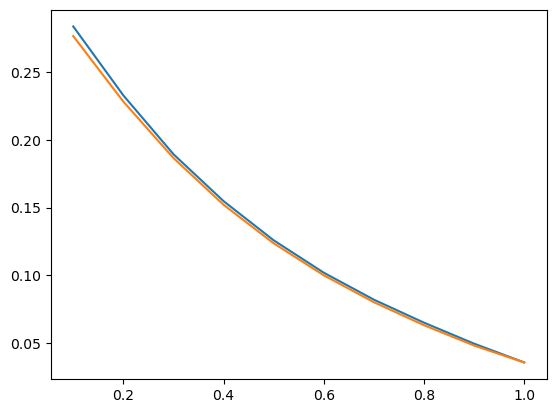

In [15]:
for D in [100]:#, 1000, 10_000]:
    vals = df.query('dscrt == @D and space == "log" and N == 3')[["H", "res"]].sort_values("H").values[1:]
    Hs = vals.T[0]
    vals = [v for (h,v) in vals] #[v - benchmarks[0.1][h] for (h,v) in vals]
    plt.plot(Hs, vals)
    
vals = [benchmarks[0.1][h] for h in Hs]
plt.plot(Hs, vals)
    #plt.ylim(0,0.01)

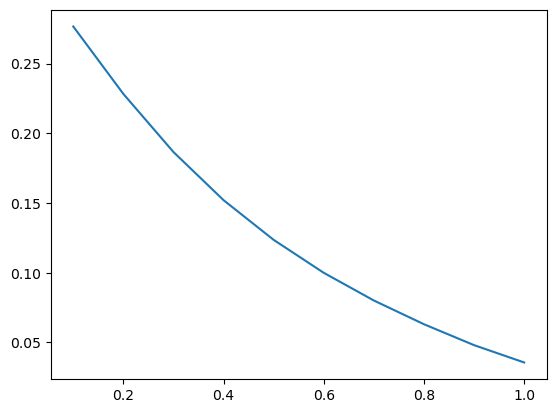

In [22]:
plt.plot(benchmarks[.1].keys(), benchmarks[.1].values())

## Benchmark

## constraint

In [ ]:
#H = 0.5
def penalty_constraint(H, x, T):
    if H == 0.5:
        return 0.5*np.sqrt(kappa)*np.tanh(T / np.sqrt(kappa)) * x**2 \
    + 0.5 * kappa * np.log(np.cosh(T / np.sqrt(kappa)))
    elif H == 1.0:
        return 0.5*np.sqrt(kappa)*np.tanh(T / np.sqrt(kappa)) * x**2 \
    + 0.5 * kappa * (T - np.sqrt(kappa) * np.tanh(0.5 * T / np.sqrt(kappa)))
    else:
        assert "H = {} is not supported".format(H)

In [60]:
(4*scipy.stats.norm.cdf(-1) - 2*scipy.stats.norm.pdf(-1)) / 6

0.025113261114590262

In [57]:
np.mean(np.maximum(np.abs(np.random.randn(100000000))-1,0)**2) / 6

0.025108112006560587